In [ ]:
from fastcore.all import *
import time
import re
from fastai.vision.all import *

cars = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')])

In [4]:
path = Path('mercedes_or_bmw2')

cars = cars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cars.dataloaders(path)

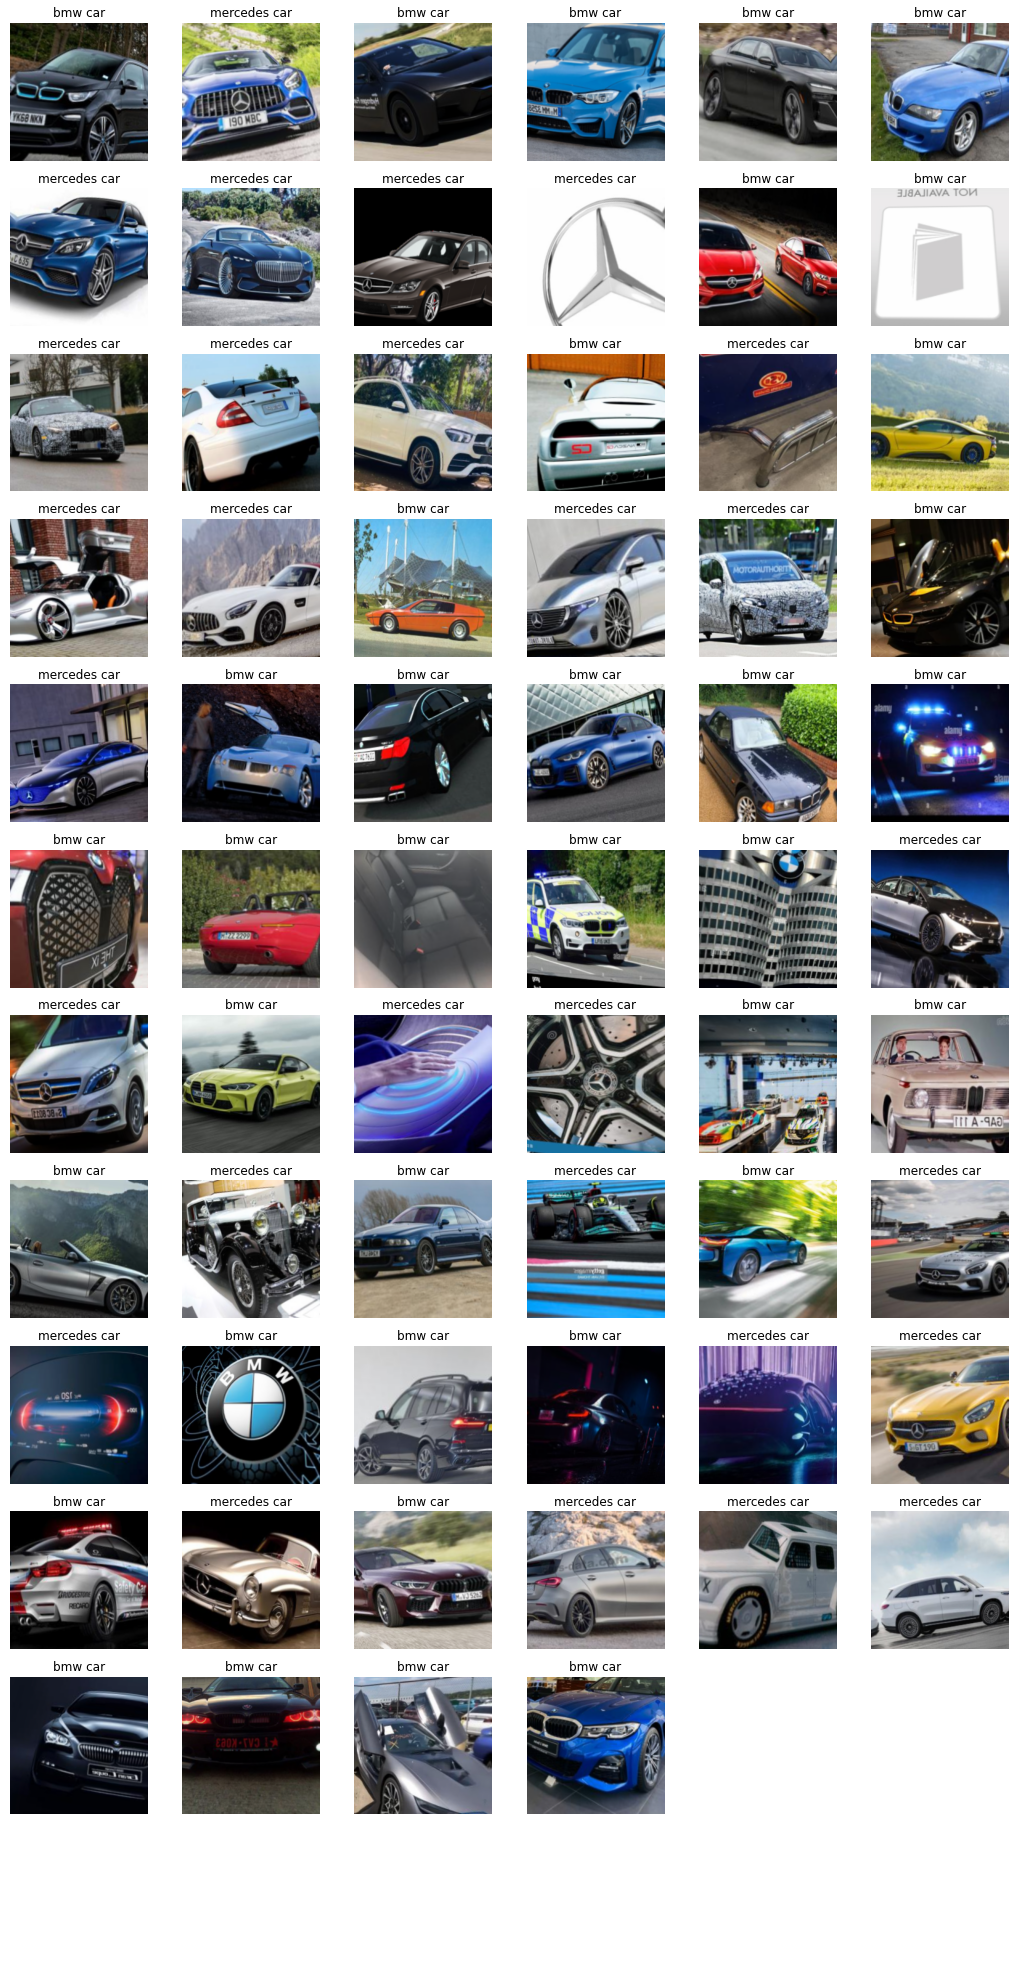

In [5]:
dls.show_batch(max_n=64, nrows=12)

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

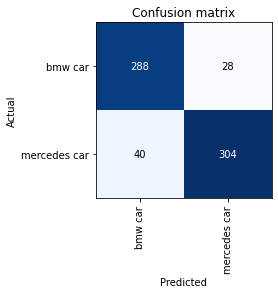

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

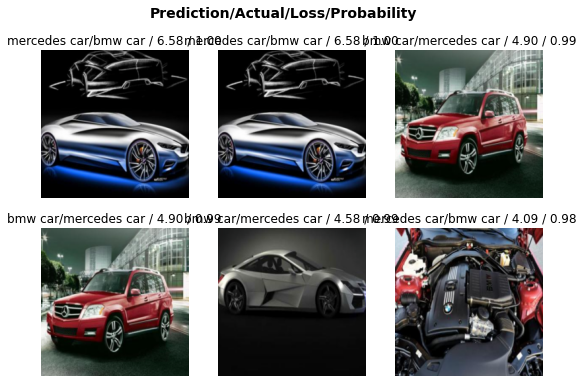

In [9]:
interp.plot_top_losses(6, nrows=2)

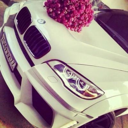

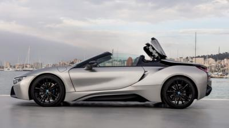

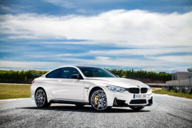

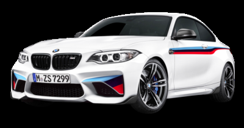

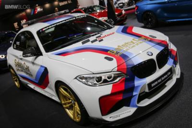

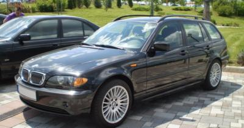

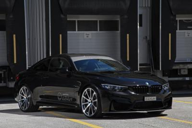

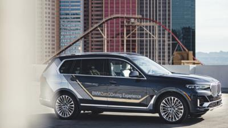

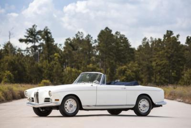

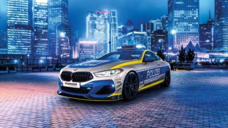

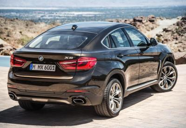

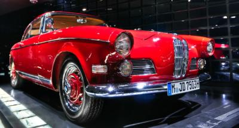

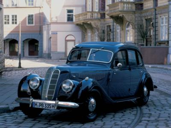

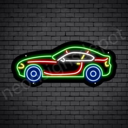

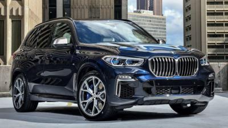

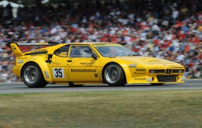

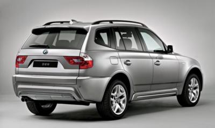

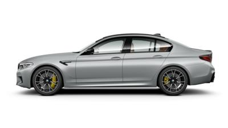

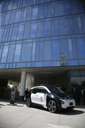

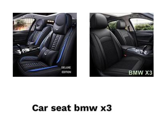

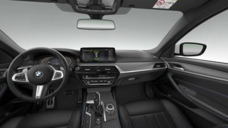

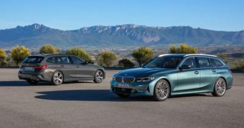

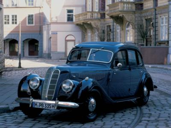

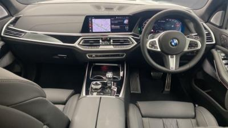

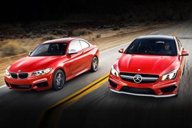

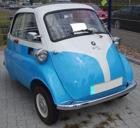

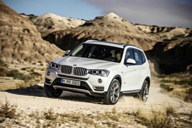

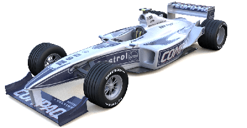

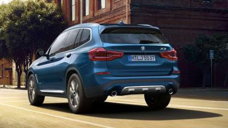

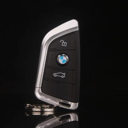

In [13]:
from fastbook import *
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

In [14]:
learn.export()